
Name : Jagtap Mahesh
Reg NO : 24MCS1017

importing required libraries
---



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, confusion_matrix, ConfusionMatrixDisplay

Loading the FashionMNIST Dataset

In [ ]:
train_df = pd.read_csv(r'/kaggle/input/fashionmnist/fashion-mnist_train.csv')
test_df =  pd.read_csv(r'/kaggle/input/fashionmnist/fashion-mnist_test.csv')

# Splitting and Preparing the Dataset

1. **Separate Features and Labels**:  
   - **`X_data`**: The pixel values of the images.
   - **`y_data`**: The labels representing the fashion categories.

2. **Train-Validation Split**:  
   - Using **`train_test_split`**,  divide the training data into training (**85%**) and validation (**15%**) sets.  
   - Stratification ensures balanced class distribution in both subsets.

3. **Convert to NumPy Arrays**:  
   -  convert all subsets (**train, validation, test**) into NumPy arrays for compatibility with TensorFlow.

4. **Shape of the Data**:  
   - Training Set: **51,000 images** with **784 features (28x28)** each.  
   - Validation Set: **9,000 images**.  
   - Test Set: **10,000 images**.  

In [ ]:
X_data = train_df.drop('label', axis=1)
y_data = train_df['label']

X_train_df, X_val_df, y_train_df, y_val_df = train_test_split(X_data, y_data, random_state=42, test_size=0.15, stratify=y_data)

X_train = X_train_df.values  # convert DataFream to np.array
y_train = y_train_df.values  # convert DataFream to np.array
X_val = X_val_df.values      # convert DataFream to np.array
y_val = y_val_df.values      # convert DataFream to np.array

X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

(X_train.shape, y_train.shape),(X_val.shape, y_val.shape), (X_test.shape, y_test.shape)

(((51000, 784), (51000,)), ((9000, 784), (9000,)), ((10000, 784), (10000,)))

#  Reshaping the Dataset for CNN

1. **Reshape the Images**:  
   - Each image is reshaped from a flat array of **784 pixels** into a **28x28** grid with **1 channel** (grayscale).  
   - This new shape is perfect for CNNs to process image data efficiently.

2. **Updated Shapes**:  
   - **Training Set**: **51,000 images**, each with shape **(28, 28, 1)**.  
   - **Validation Set**: **9,000 images**, reshaped and ready to validate model.  
   - **Test Set**: **10,000 images**, waiting to challenge trained model!

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

(X_train.shape, y_train.shape),(X_val.shape, y_val.shape), (X_test.shape, y_test.shape)

(((51000, 28, 28, 1), (51000,)),
 ((9000, 28, 28, 1), (9000,)),
 ((10000, 28, 28, 1), (10000,)))

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train = train_datagen.flow(X_train, y_train, batch_size=32, seed=42, shuffle=True)
val = val_datagen.flow(X_val, y_val, batch_size=32, shuffle=False)
test = test_datagen.flow(X_test, y_test, batch_size=32, shuffle=False)


 Building and Training the CNN Model

In [ ]:
model = tf.keras.Sequential([
    # input Layer
    tf.keras.layers.InputLayer(shape=(28, 28, 1)),

    tf.keras.layers.Conv2D(filters=256, kernel_size = (3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    # 3st CNN Layer
    tf.keras.layers.Conv2D(filters=128, kernel_size = (3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),

    # Global Average Pooling
    tf.keras.layers.Flatten(),

    # 2st Fully Connected Layer
    tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu),
    tf.keras.layers.BatchNormalization(),

    # output Layer
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax),

])

model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = [tf.keras.metrics.SparseCategoricalAccuracy])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',          # Monitor the validation loss
    patience=5,                  # Stop training after 3 epochs without improvement
    verbose=1,                   # Print a message when stopping
    mode='min',                  # Looking for the minimum validation loss
    restore_best_weights=True,   # Restore weights from the best epoch
)

history = model.fit(
    train,
    epochs=25,
    validation_data=val,
    callbacks=[early_stopping]
)

Epoch 1/25
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 0.5277 - sparse_categorical_accuracy: 0.8149 - val_loss: 0.3866 - val_sparse_categorical_accuracy: 0.8563
Epoch 2/25
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.3131 - sparse_categorical_accuracy: 0.8874 - val_loss: 0.2768 - val_sparse_categorical_accuracy: 0.9009
Epoch 3/25
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2719 - sparse_categorical_accuracy: 0.9016 - val_loss: 0.2533 - val_sparse_categorical_accuracy: 0.9119
Epoch 4/25
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2510 - sparse_categorical_accuracy: 0.9099 - val_loss: 0.2533 - val_sparse_categorical_accuracy: 0.9078
Epoch 5/25
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.2334 - sparse_categorical_accuracy: 0.9136 - val_loss: 0.2261 - val_sparse_categorical_accuracy: 0.9171
Epoch 6/25
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2152 - sparse_categorical_accuracy: 0.9186 - val_loss: 0.2532 - val_sparse_categorical_accuracy

# 📊 Visualizing


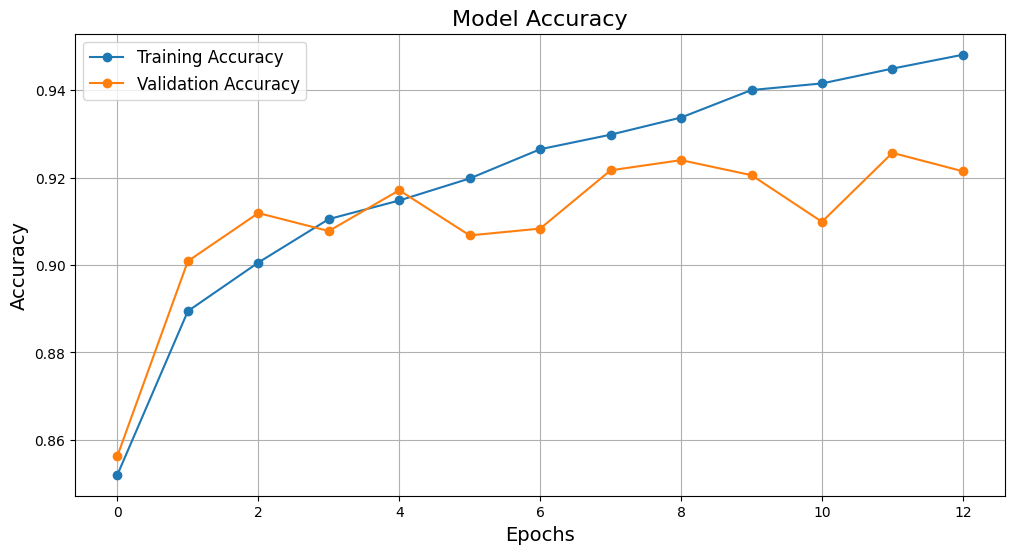

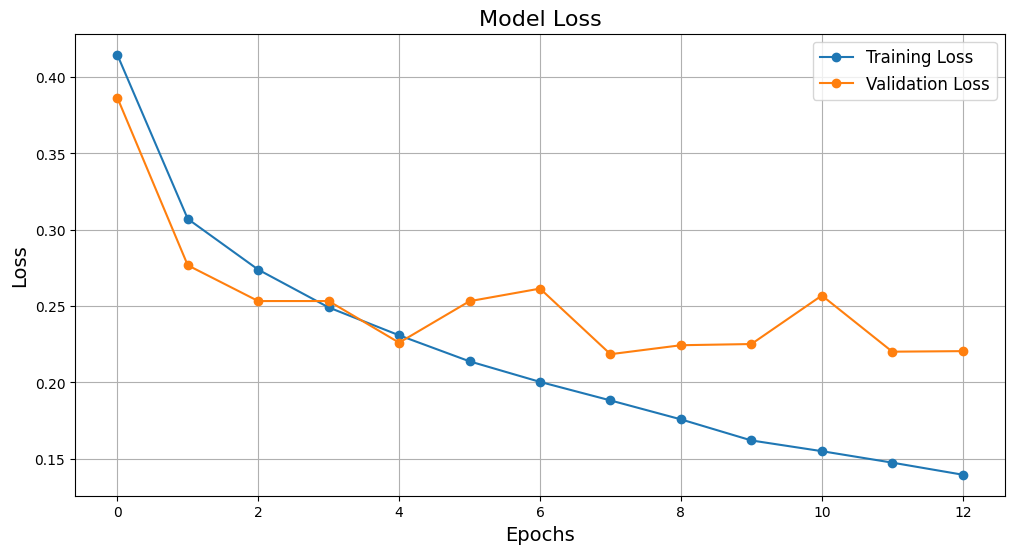

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

#  Model Evaluation on the Test Set

In [ ]:
model.evaluate(test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2100 - sparse_categorical_accuracy: 0.9217


[0.2053046077489853, 0.9247999787330627]

In [ ]:
pred = model.predict(test)
pred_y = pred.argmax(axis=1)
print(classification_report(test.y, pred_y))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1000
           1       0.99      0.99      0.99      1000
           2       0.90      0.88      0.89      1000
           3       0.91      0.95      0.93      1000
           4       0.85      0.94      0.89      1000
           5       1.00      0.96      0.98      1000
           6       0.84      0.72      0.77      1000
           7       0.96      0.96      0.96      1000
           8       0.99      0.99      0.99      1000
           9       0.95      0.98      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



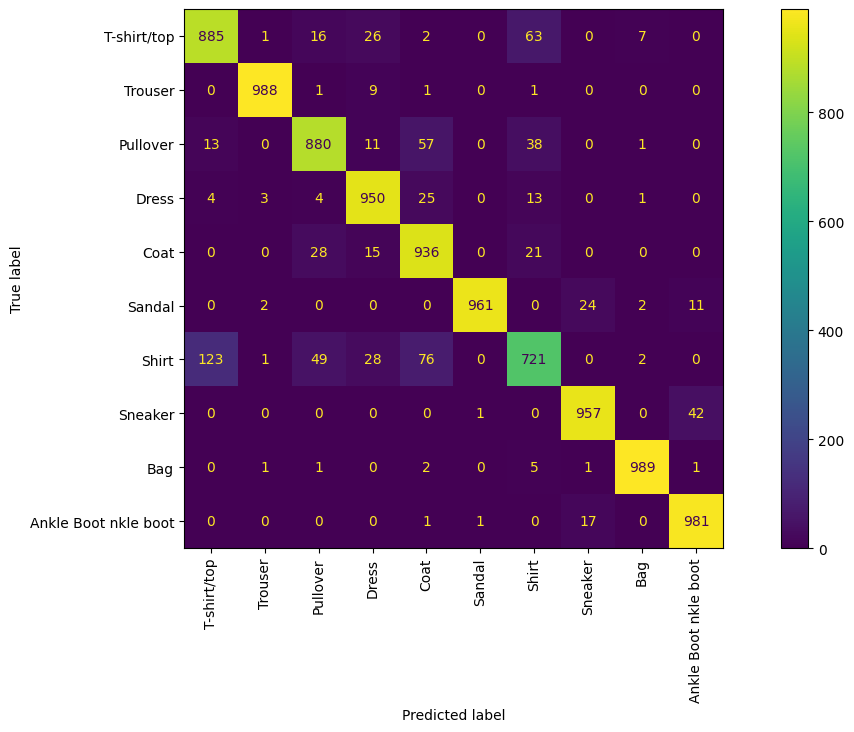

In [ ]:
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot nkle boot']

fig, ax = plt.subplots(figsize=(15, 7))

disp = ConfusionMatrixDisplay(confusion_matrix(test.y, pred_y), display_labels=label)
disp.plot(ax=ax)
plt.xticks(rotation = 90)
plt.show()